## Library included:

In [2]:
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

## numpy operations
### Compare

In [2]:
a = tf.constant([1, 2, 3, 1, 1])
b = tf.constant([0, 1, 3, 4, 5])
c = tf.where(tf.greater(a, b), a, b)  # 若a>b，返回a对应位置的元素，否则返回b对应位置的元素
print("c：", c)

c： tf.Tensor([1 2 3 4 5], shape=(5,), dtype=int32)


### Create array from random number

In [3]:
rdm = np.random.RandomState(seed=1)    # seed is optional
a = rdm.rand()    # return a random number (0-1)
b = rdm.rand(2, 3)    # return a 2*3 matrix with random number(0-1)
print("a:", a)
print("b:", b)

a: 0.417022004702574
b: [[7.20324493e-01 1.14374817e-04 3.02332573e-01]
 [1.46755891e-01 9.23385948e-02 1.86260211e-01]]


### Array merge

In [4]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
c = np.vstack((a, b))
print("c:\n", c)

c:
 [[1 2 3]
 [4 5 6]]


### ```np.mgrid[]```
可以传入n个一维数组，这里传入两个。根据传入的两个一维数组参数生成两个数组元素的列表。

生成的第一个二维数组是以xarray为行，共ydimesion行的矩阵。而第二个二维数组是以yarray的转置为列，共xdimesion列的矩阵。

可用作表示一个区域的所有坐标点。或者作为测试时的x。

In [27]:
# 生成等间隔数值点
x, y= np.mgrid[-3:3:1, -3:3:1]

print("x:\n", x)
print("y:\n", y)

# 矩阵（1, 2）位置上的坐标点：
print(x[1, 2], y[1, 2])

x:
 [[-3 -3 -3 -3 -3 -3]
 [-2 -2 -2 -2 -2 -2]
 [-1 -1 -1 -1 -1 -1]
 [ 0  0  0  0  0  0]
 [ 1  1  1  1  1  1]
 [ 2  2  2  2  2  2]]
y:
 [[-3 -2 -1  0  1  2]
 [-3 -2 -1  0  1  2]
 [-3 -2 -1  0  1  2]
 [-3 -2 -1  0  1  2]
 [-3 -2 -1  0  1  2]
 [-3 -2 -1  0  1  2]]
-2 -1


### ```.reval()```
Turn the input matrix into 1-D vector, row by row.

In [28]:
print("x.ravel():\n", x.ravel())
print("y.ravel():\n", y.ravel())

x.ravel():
 [-3 -3 -3 -3 -3 -3 -2 -2 -2 -2 -2 -2 -1 -1 -1 -1 -1 -1  0  0  0  0  0  0
  1  1  1  1  1  1  2  2  2  2  2  2]
y.ravel():
 [-3 -2 -1  0  1  2 -3 -2 -1  0  1  2 -3 -2 -1  0  1  2 -3 -2 -1  0  1  2
 -3 -2 -1  0  1  2 -3 -2 -1  0  1  2]


### ```np.c_[]```
Merge matrix according to their index.

In [29]:
# 将x, y拉直，并合并配对为二维张量，生成二维坐标点
grid = np.c_[x.ravel(), y.ravel()]
print('grid:\n', grid)

grid:
 [[-3 -3]
 [-3 -2]
 [-3 -1]
 [-3  0]
 [-3  1]
 [-3  2]
 [-2 -3]
 [-2 -2]
 [-2 -1]
 [-2  0]
 [-2  1]
 [-2  2]
 [-1 -3]
 [-1 -2]
 [-1 -1]
 [-1  0]
 [-1  1]
 [-1  2]
 [ 0 -3]
 [ 0 -2]
 [ 0 -1]
 [ 0  0]
 [ 0  1]
 [ 0  2]
 [ 1 -3]
 [ 1 -2]
 [ 1 -1]
 [ 1  0]
 [ 1  1]
 [ 1  2]
 [ 2 -3]
 [ 2 -2]
 [ 2 -1]
 [ 2  0]
 [ 2  1]
 [ 2  2]]


## Complexity of neural network

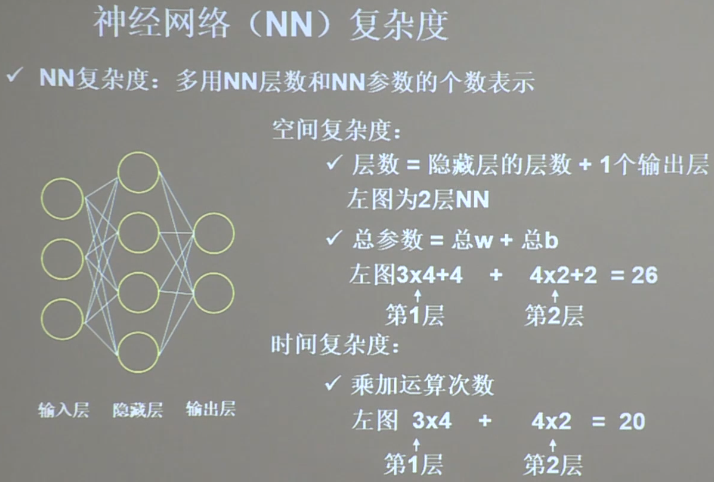

## Learning rate
### Exponentialy decay learning rate

In [8]:
epoch = 40
LR_BASE = 0.2  # 最初学习率
LR_DECAY = 0.99  # 学习率衰减率
LR_STEP = 1  # 喂入多少轮BATCH_SIZE后，更新一次学习率

for epoch in range(epoch):  
    # for epoch 定义顶层循环，表示对数据集循环epoch次，此例数据集数据仅有1个w,初始化时候constant赋值为5，循环100次迭代。
    lr = LR_BASE * LR_DECAY ** (epoch / LR_STEP)

## Activation function
激活函数要求：<br>
1. 非线性：激活函数非线性时，多层神经网络可逼近所有函数。<br>
2. 可微性：优化器大多用梯度下降更新参数。<br>
3. 单调性：当激活函数是单调的，能保证单层网络的损失函数是凸函数。<br>
4. 近似恒等性：当参数初始化为随机小值时，f(x)~= x，神经网络更稳定。<br>

激活函数输出值的范围：<br>
1. 激活函数输出为有限值时，权重对特征的影响会更显著，基于梯度的优化方法更稳定。<br>
2. 激活函数输出为无限值时，参数的初始值对模型的影响非常大。建议调小学习率。<br>

### Sigmoid function
```tf.nn.sigmoid(x)```<br><br>
它能够把输入的连续实值变换为0和1之间的输出，如果是非常大的负数，那么输出就是0；如果是非常大的正数，输出就是1。
缺点：<br>
1. 深层网络中会有多个0-0.25相乘，会造成梯度消失。<br>
2. 输出的均值非0，收敛慢。<br>
3. 幂运算复杂，训练时间长。<br>

### Tanh function
```tf.math.tanh(x)```<br><br>
特点：<br>
1. 依旧会造成梯度消失。<br>
2. 输出的均值是0。<br>
3. 幂运算复杂，训练时间长。<br>

### Relu function
```tf.nn.relu(x)```<br><br>
优点：<br>
1. 在正区间解决了梯度消失的问题。<br>
2. 计算速度快。<br>
3. 收敛速度快于Sigmoid和Tanh。<br>

缺点：<br>
1. 输出的均值非0，收敛慢。<br>
2. Dead Relu问题：当一开始某神经元的输出是负数，经过Relu后输出0，回馈的梯度也是0，此神经元无法更新。<br>

### Leaky Relu function
```tf.nn.leaky_relu(x)```<br><br>
特点：
1. 在负区间输出接近零的值，但实际操作总能没有完全证明Leaky Relu总是好于Relu。

### 总结
1. 首选Relu函数。<br>
2. 学习率设置较小值。<br>
3. 输入特征标准化，让输入特征满足以0为均值，1为标准差的正态分布。<br>
4. 初始参数中心化，让随机生成的参数满足以0为均值，sqrt(2 / 当前层输入特征个数)为标准差的正态分布。<br>

## Loss function
### Mean Squared Error
```loss_mse = tf.reduced_mean(tf.square(target_y, model_y))```<br><br>

示例：
预测酸奶销量y，x1 和 x2 是影响日销量的因素。

In [9]:
rdm = np.random.RandomState(23455)  # 生成[0,1)之间的随机数
x = rdm.rand(32, 2)
y_ = [[x1 + x2 + (rdm.rand() / 10.0 - 0.05)] for (x1, x2) in x]  # 生成噪声[0,1)/10=[0,0.1); [0,0.1)-0.05=[-0.05,0.05)
x = tf.cast(x, dtype=tf.float32)

w1 = tf.Variable(tf.random.normal([2, 1], stddev=1, seed=1))    # 生成初始参数

epoch = 1000
lr = 0.05

for epoch in range(epoch):
    with tf.GradientTape() as tape:
        y = tf.matmul(x, w1)
        loss_mse = tf.reduce_mean(tf.square(y_ - y))
    grads = tape.gradient(loss_mse, w1)
    w1.assign_sub(lr * grads)

    if epoch % 200 == 0:
        print("After %d training steps,w1 is " % (epoch))
        print(w1.numpy(), "\n")
print("Final w1 is: ", w1.numpy())

After 0 training steps,w1 is 
[[-0.7689652]
 [ 1.5075231]] 

After 200 training steps,w1 is 
[[0.8327364]
 [1.1453496]] 

After 400 training steps,w1 is 
[[0.98087573]
 [1.0153886 ]] 

After 600 training steps,w1 is 
[[1.0011083]
 [0.9976369]] 

After 800 training steps,w1 is 
[[1.0038716]
 [0.9952124]] 

Final w1 is:  [[1.0042481]
 [0.9948818]]


### Customised loss function
更进一步考虑，预测少了损失利润，预测多了损失成本。如果利润大于成本很多，代表生产过多的惩罚低，就会倾向于多生产。

In [10]:
COST = 1
PROFIT = 99

rdm = np.random.RandomState(23455)
x = rdm.rand(32, 2)
y_ = [[x1 + x2 + (rdm.rand() / 10.0 - 0.05)] for (x1, x2) in x]  # 生成噪声[0,1)/10=[0,0.1); [0,0.1)-0.05=[-0.05,0.05)
x = tf.cast(x, dtype=tf.float32)

w1 = tf.Variable(tf.random.normal([2, 1], stddev=1, seed=1))

epoch = 10000
lr = 0.002

for epoch in range(epoch):
    with tf.GradientTape() as tape:
        y = tf.matmul(x, w1)
        loss = tf.reduce_sum(tf.where(tf.greater(y, y_), (y - y_) * COST, (y_ - y) * PROFIT))

    grads = tape.gradient(loss, w1)
    w1.assign_sub(lr * grads)

    if epoch % 2000 == 0:
        print("After %d training steps,w1 is " % (epoch))
        print(w1.numpy(), "\n")
print("Final w1 is: ", w1.numpy())

After 0 training steps,w1 is 
[[2.8786578]
 [3.2517848]] 

After 2000 training steps,w1 is 
[[1.1758107]
 [1.1724023]] 

After 4000 training steps,w1 is 
[[1.1751455]
 [1.1323601]] 

After 6000 training steps,w1 is 
[[1.1158477]
 [1.0810255]] 

After 8000 training steps,w1 is 
[[1.1151826]
 [1.0409834]] 

Final w1 is:  [[1.1255957]
 [1.0237043]]


### Cross entropy
```tf.losses.categorical_crossentropy(targer_y, model_y)```

### Softmax + Cross entropy
```tf.nn.softmax_cross_entropy_with_logits(target_y, model_y)```

## Underfitting and overfitting

### Solve underfitting
1. 增加输入特征项
2. 增加网络参数
3. 减少正则化参数

### Solve Overfitting
1. 数据清洗，减少噪声。
2. 增大训练集
3. 采用/增大正则化参数。

### Regularization
* L1正则化
$$loss = \sum_{i} {w}_i$$
L1 正则化大概率会使很多参数变为零，因此该方法可通过稀疏参数，即减少参数的数量，降低复杂度。<br><br>

* L2正则化
$$loss = \sum_{i} {w}_i^2$$
L2 正则化会使参数很接近零但不为零，因此该方法可通过减小参数值的大小降低复杂度。

## Regularization example
### Prepare the dataset

In [13]:
from pandas import DataFrame

# 读入数据/标签 生成x_train y_train
df = pd.read_csv('class2\dot.csv')
x_train = np.array(df[['x1', 'x2']])
y_train = np.array(df['y_c']).reshape(-1, 1)

Y_color = [['red' if y else 'blue'] for y in y_train]

x_train = tf.cast(x_train, tf.float32)
y_train = tf.cast(y_train, tf.float32)

# from_tensor_slices函数切分传入的张量的第一个维度，生成相应的数据集，使输入特征和标签值一一对应
train_db = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(32)

### Construct the weights, bias and parameters

In [16]:
# 生成神经网络的参数，输入层为2个神经元，隐藏层为11个神经元，1层隐藏层，输出层为1个神经元
# 用tf.Variable()保证参数可训练
w1 = tf.Variable(tf.random.normal([2, 11]), dtype=tf.float32)
b1 = tf.Variable(tf.constant(0.01, shape=[11]))

w2 = tf.Variable(tf.random.normal([11, 1]), dtype=tf.float32)
b2 = tf.Variable(tf.constant(0.01, shape=[1]))

lr = 0.01  # 学习率为
epoch = 400  # 循环轮数

### Construct neural network

In [17]:
for epoch in range(epoch):
    for step, (x_train, y_train) in enumerate(train_db):
        with tf.GradientTape() as tape:  # 记录梯度信息

            h1 = tf.matmul(x_train, w1) + b1  # 记录神经网络乘加运算
            h1 = tf.nn.relu(h1)
            y = tf.matmul(h1, w2) + b2

            # 采用均方误差损失函数mse = mean(sum(y-out)^2)
            loss_mse = tf.reduce_mean(tf.square(y_train - y))
            # 添加l2正则化
            loss_regularization = []
            # tf.nn.l2_loss(w)=sum(w ** 2) / 2
            loss_regularization.append(tf.nn.l2_loss(w1))
            loss_regularization.append(tf.nn.l2_loss(w2))
            # 全部加总
            loss_regularization = tf.reduce_sum(loss_regularization)
            loss = loss_mse + 0.03 * loss_regularization #REGULARIZER = 0.03

        # 计算loss对各个参数的梯度
        variables = [w1, b1, w2, b2]
        grads = tape.gradient(loss, variables)

        # 实现梯度更新
        # w1 = w1 - lr * w1_grad
        w1.assign_sub(lr * grads[0])
        b1.assign_sub(lr * grads[1])
        w2.assign_sub(lr * grads[2])
        b2.assign_sub(lr * grads[3])

    # 每200个epoch，打印loss信息
    if epoch % 20 == 0:
        print('epoch:', epoch, 'loss:', float(loss))

epoch: 0 loss: 0.9167196154594421
epoch: 20 loss: 0.3532510995864868
epoch: 40 loss: 0.30561187863349915
epoch: 60 loss: 0.27203240990638733
epoch: 80 loss: 0.24403047561645508
epoch: 100 loss: 0.22040843963623047
epoch: 120 loss: 0.2004108428955078
epoch: 140 loss: 0.18308749794960022
epoch: 160 loss: 0.16806676983833313
epoch: 180 loss: 0.15497548878192902
epoch: 200 loss: 0.14347539842128754
epoch: 220 loss: 0.1331617534160614
epoch: 240 loss: 0.12437857687473297
epoch: 260 loss: 0.11674115806818008
epoch: 280 loss: 0.11012803763151169
epoch: 300 loss: 0.10438323765993118
epoch: 320 loss: 0.09949037432670593
epoch: 340 loss: 0.09534943848848343
epoch: 360 loss: 0.09184027463197708
epoch: 380 loss: 0.08891414105892181


### Predict

In [30]:
print("*******predict*******")
# xx在-3到3之间以步长为0.01，yy在-3到3之间以步长0.01,生成间隔数值点
xx, yy = np.mgrid[-3:3:.1, -3:3:.1]
# 将xx, yy拉直，并合并配对为二维张量，生成区间内所有二维坐标点
grid = np.c_[xx.ravel(), yy.ravel()]
grid = tf.cast(grid, tf.float32)
print(grid)

*******predict*******
tf.Tensor(
[[-3.  -3. ]
 [-3.  -2.9]
 [-3.  -2.8]
 ...
 [ 2.9  2.7]
 [ 2.9  2.8]
 [ 2.9  2.9]], shape=(3600, 2), dtype=float32)


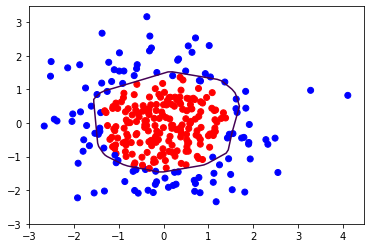

In [35]:
# 将区间内网格坐标点喂入神经网络，作为预测，probs为输出
probs = []
for x_predict in grid:
    # 使用训练好的参数进行预测
    h1 = tf.matmul([x_predict], w1) + b1
    h1 = tf.nn.relu(h1)
    y = tf.matmul(h1, w2) + b2  # y为预测结果
    probs.append(y)

# 取第0列给x1，取第1列给x2
x1 = x_data[:, 0]
x2 = x_data[:, 1]

# probs的shape调整成xx的样子 (60 * 60)
probs = np.array(probs).reshape(xx.shape)
# 绘制训练集
plt.scatter(x1, x2, color=np.squeeze(Y_color))
# 把坐标xx yy和对应的值probs放入contour<[‘kɑntʊr]>函数，给probs值为0.5的所有点上色  plt点show后 显示的是红蓝点的分界线
plt.contour(xx, yy, probs, levels=[.5])
plt.show()